In [1]:
# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
X = dataset.iloc[:, :-1].values ## independent variable. ## Grab everything except the last column
y = dataset.iloc[:, 1].values ## dependant variable

print("\n")
print(X[0:5])
print("\n")
print(y[0:5])



[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]


[39343. 46205. 37731. 43525. 39891.]


In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

print(X_train)
print("\n")
print(y_train)

[[ 7.1]
 [10.3]
 [ 1.1]
 [ 5.3]
 [ 2.9]
 [ 1.3]
 [ 9.6]
 [ 4. ]
 [ 6.8]
 [ 6. ]
 [ 8.7]
 [ 3.2]
 [ 2.2]
 [ 3.2]
 [ 3.7]
 [ 5.1]
 [ 7.9]
 [ 3. ]
 [ 4.9]
 [ 4.5]
 [ 2. ]]


[ 98273. 122391.  39343.  83088.  56642.  46205. 112635.  56957.  91738.
  93940. 109431.  54445.  39891.  64445.  57189.  66029. 101302.  60150.
  67938.  61111.  43525.]


In [5]:
print(X_test)
print("\n")
print(y_test)

[[ 4. ]
 [10.5]
 [ 8.2]
 [ 9. ]
 [ 5.9]
 [ 3.9]
 [ 1.5]
 [ 4.1]
 [ 9.5]]


[ 55794. 121872. 113812. 105582.  81363.  63218.  37731.  57081. 116969.]


In [6]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.coef_)

[9298.06674988]


In [7]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 64374.49262392, 124811.92649812, 103426.3729734 , 110864.82637331,
        82040.81944869,  63444.68594893,  41129.32574923,  65304.29929891,
       115513.85974824])

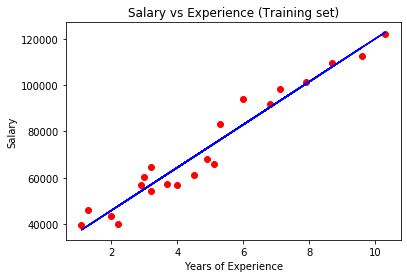

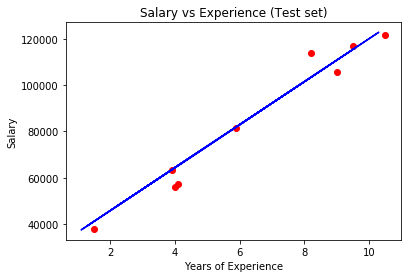

In [8]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [9]:
from sklearn import metrics

In [10]:
## The lower these metrics, the better the model is
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4574.460357716664
MSE: 33315228.09372838
RMSE: 5771.934519182315


In [11]:
## Higher the Explained Variance Score, the better the model is:
## How well our model can explain variations in the dataset
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
## 97.7% of the variance is explained by the model

Explained Variance Score: 0.9666637943344502


In [12]:
from sklearn.metrics import r2_score 
## How well the model can explain future data
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

r2: 0.9624024983951907


In [13]:
y_pred = regressor.predict(11)
y_pred

ValueError: Expected 2D array, got scalar array instead:
array=11.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#Conclusion : 
#1. I am 97.7% confident that my model has learnt variations in the data
#2. I am 97.4% confident that the salary of the person will be (129740-4834) to (129740+4834)
#3. 97.4% = r2, 97.7%= variance, 4834=RMSE

In [ ]:
y_pred = regressor.predict(11.5)
y_pred

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
regressor_kfold = LinearRegression()
regression_avg = cross_val_score(estimator = regressor_kfold, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross Val Mean Absolute Error",regression_avg.mean())